# Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data¶


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Pritee\\OneDrive\\Documents\\data science assignments\\assignments\\PCA\\wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
x = df.iloc[:,:-1]

In [4]:
x

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62


In [5]:
x.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000


# PCA

In [6]:
sc = StandardScaler()

x = sc.fit_transform(x)
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,1.596725e-16,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-1.213944e+00,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00
25%,-1.213944e+00,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01
50%,7.996036e-02,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01
75%,1.373864e+00,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01
max,1.373864e+00,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00


In [7]:
x

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.25171685,
         0.36217728,  1.84791957],
       [-1.21394365,  0.24628963, -0.49941338, ..., -0.29332133,
         0.40605066,  1.1134493 ],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.26901965,
         0.31830389,  0.78858745],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ...,  2.22423597,
        -1.61212515, -1.48544548],
       [ 1.37386437,  0.20923168,  0.22769377, ...,  1.83492299,
        -1.56825176, -1.40069891],
       [ 1.37386437,  1.39508604,  1.58316512, ...,  1.79166599,
        -1.52437837, -1.42894777]])

In [8]:
pca = PCA()
pcs = pca.fit_transform(x)

In [9]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-3.260580,1.736054,-0.405701,0.687419,0.200386,-0.359880,0.632731,0.046907,-0.820645,0.618012,0.465836,0.486805,0.294675
1,-2.358620,-0.509786,-1.937094,0.080793,-0.530808,-0.934456,0.010388,-1.011932,-0.112133,-0.187387,0.378904,0.182328,0.105390
2,-2.453376,1.120704,0.892834,-0.782643,0.378624,0.569583,0.415002,0.114857,-0.576821,-0.922386,0.033796,-0.115035,-0.161369
3,-3.253148,2.686416,-0.411249,-0.555531,0.087066,0.271407,-0.414701,-0.644758,0.281428,0.626387,-0.178538,0.324122,-0.197160
4,-1.403734,1.320100,1.854434,0.503217,-0.285707,-0.666474,0.515031,-0.347955,-0.184441,-0.123972,-0.269699,-0.190014,-0.338264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.886054,1.707484,-0.443465,-1.264981,-0.032341,-1.103732,0.851965,0.215097,0.414076,-0.093161,0.177757,0.181033,0.034659
174,3.148970,1.386257,0.127645,-0.165248,0.457328,-0.006777,0.108374,0.530442,0.253675,-0.026677,-0.250032,0.086710,-0.127952
175,3.384134,2.255285,-1.133039,0.505402,1.098278,0.071138,0.708909,-0.072243,0.348921,0.155599,0.748714,-0.218622,-0.075851
176,3.078204,1.791104,-0.639500,1.109167,0.294664,1.019720,0.737921,-0.440155,-0.289070,0.444341,0.366244,0.076042,0.035184


In [10]:
pca.explained_variance_ratio_

array([0.3996507 , 0.16770494, 0.10920338, 0.0683296 , 0.06528109,
       0.05148865, 0.04248671, 0.02680753, 0.02028839, 0.01995798,
       0.01304329, 0.01042324, 0.00533449])

In [11]:
np.cumsum(pca.explained_variance_ratio_)

array([0.3996507 , 0.56735564, 0.67655902, 0.74488863, 0.81016972,
       0.86165837, 0.90414508, 0.93095261, 0.951241  , 0.97119898,
       0.98424227, 0.99466551, 1.        ])

Text(0.5, 1.0, 'Scree Plot')

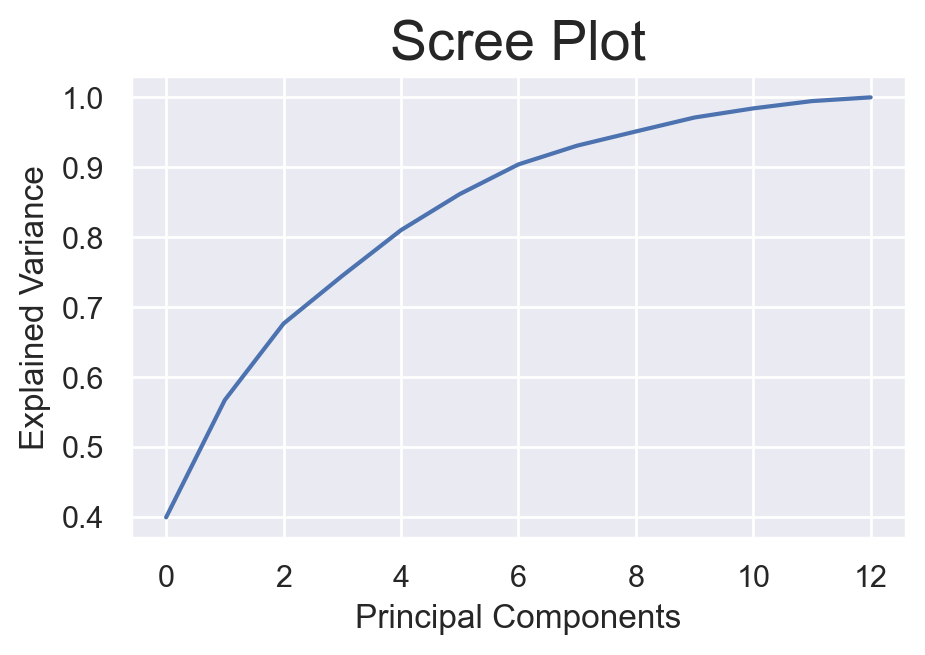

In [12]:
plt.figure(figsize=(5,3),dpi=200)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)

In [36]:
selected_columns = pcs[:, [6,7,8]]
data = pd.DataFrame(selected_columns, columns=['PC6','PC7','PC8'])
data

,PC6,PC7,PC8
0,0.632731,0.046907,-0.820645
1,0.010388,-1.011932,-0.112133
2,0.415002,0.114857,-0.576821
3,-0.414701,-0.644758,0.281428
4,0.515031,-0.347955,-0.184441
...,...,...,...
173,0.851965,0.215097,0.414076
174,0.108374,0.530442,0.253675
175,0.708909,-0.072243,0.348921
176,0.737921,-0.440155,-0.289070


# Hierarchical Clustering¶


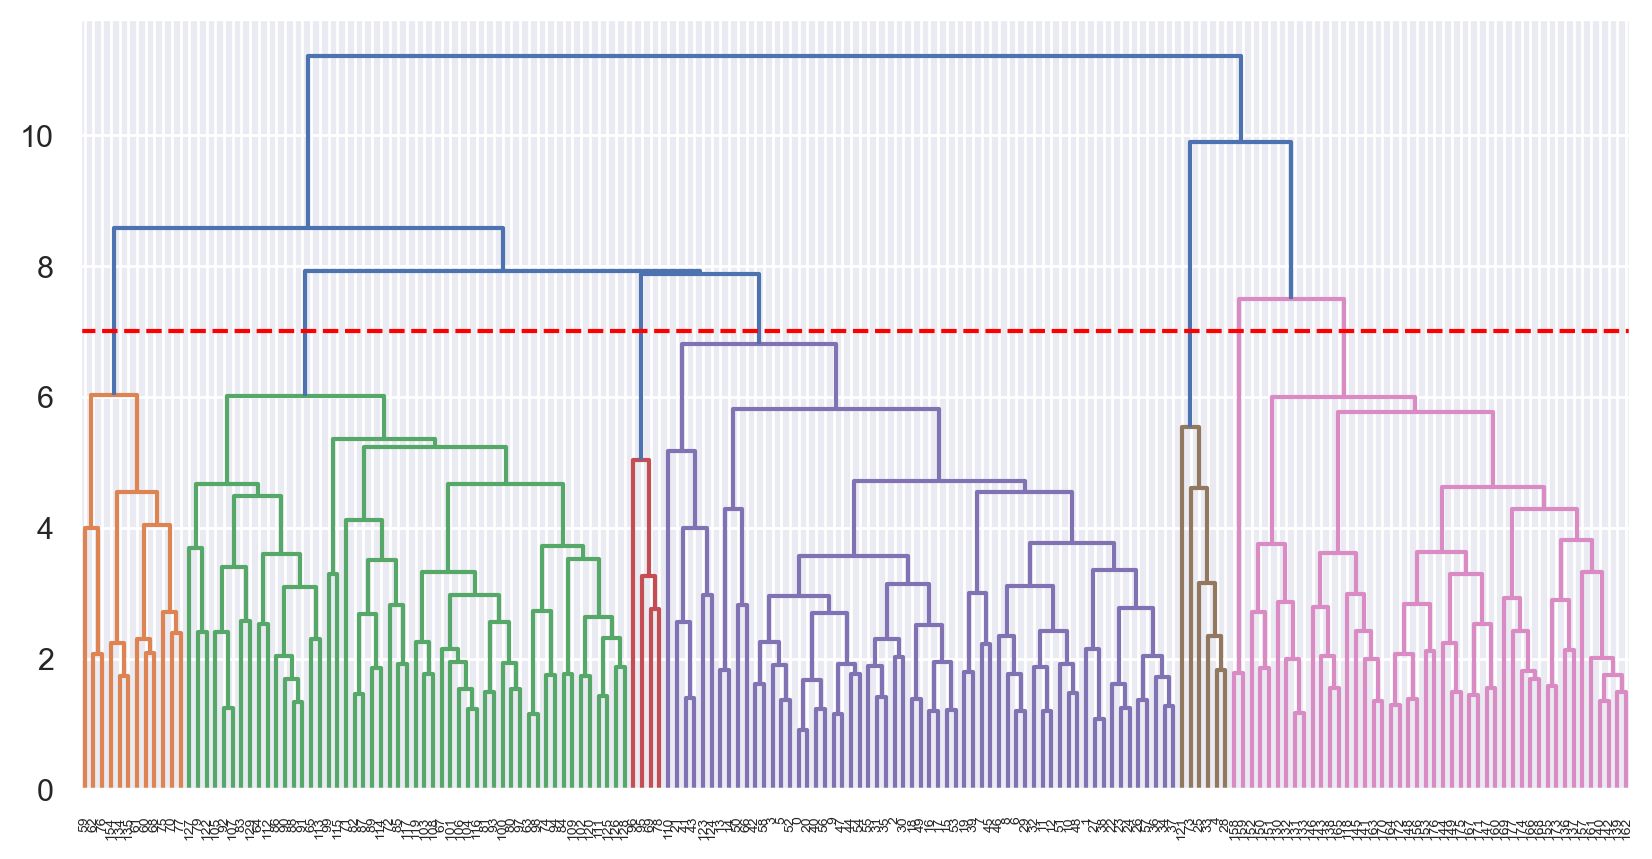

In [37]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 7, linestyle = '--', color = 'red')

# model building

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [39]:
hc = AgglomerativeClustering(n_clusters=7)

ypred = hc.fit_predict(x)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 4, 0,
       1, 0, 2, 6, 4, 1, 4, 3, 0, 4, 0, 4, 6, 4, 0, 0, 4, 4, 0, 0, 4, 4,
       4, 4, 4, 4, 4, 0, 0, 6, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0,
       0, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 3, 4, 0, 0, 0, 0, 4, 0, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 5, 5, 5, 5, 5, 5,
       2, 2, 5, 2, 5, 5, 2, 2, 2, 2, 5, 2, 5, 5, 5, 5, 2, 5, 5, 2, 5, 5,
       5, 5], dtype=int64)

In [40]:
data

,PC6,PC7,PC8
0,0.632731,0.046907,-0.820645
1,0.010388,-1.011932,-0.112133
2,0.415002,0.114857,-0.576821
3,-0.414701,-0.644758,0.281428
4,0.515031,-0.347955,-0.184441
...,...,...,...
173,0.851965,0.215097,0.414076
174,0.108374,0.530442,0.253675
175,0.708909,-0.072243,0.348921
176,0.737921,-0.440155,-0.289070


In [41]:
data['cluster'] = ypred
data

,PC6,PC7,PC8,cluster
0,0.632731,0.046907,-0.820645,1
1,0.010388,-1.011932,-0.112133,1
2,0.415002,0.114857,-0.576821,1
3,-0.414701,-0.644758,0.281428,1
4,0.515031,-0.347955,-0.184441,1
...,...,...,...,...
173,0.851965,0.215097,0.414076,2
174,0.108374,0.530442,0.253675,5
175,0.708909,-0.072243,0.348921,5
176,0.737921,-0.440155,-0.289070,5


In [42]:
data[data['cluster']==0].mean()

PC6       -0.294430
PC7       -0.126459
PC8        0.111913
cluster    0.000000
dtype: float64

In [43]:
data[data['cluster'] == 1]

,PC6,PC7,PC8,cluster
0,0.632731,0.046907,-0.820645,1
1,0.010388,-1.011932,-0.112133,1
2,0.415002,0.114857,-0.576821,1
3,-0.414701,-0.644758,0.281428,1
4,0.515031,-0.347955,-0.184441,1
5,0.383951,-0.386573,0.310603,1
6,-0.015083,0.300239,-1.058435,1
7,-0.054896,-0.204081,-0.374867,1
8,0.152904,0.635341,-0.238384,1
9,-0.838005,-0.128420,-0.126356,1


In [44]:
#Analyzing the clusters
data.groupby('cluster').agg('mean')

,PC6,PC7,PC8
cluster,,,
0,-0.294430,-0.126459,0.111913
1,-0.020489,0.005577,-0.078337
2,0.169179,-0.124824,0.140160
3,-0.187736,-0.174949,0.337522
4,0.315280,0.154920,-0.158423
5,-0.357715,0.127772,0.043308
6,2.112333,0.549957,-0.408193


In [45]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=178, centers=7, random_state=42)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the result
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.5430


# k mean clustering

In [46]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [47]:
from sklearn.cluster import KMeans

In [48]:
data.head()

,PC6,PC7,PC8,cluster
0,0.632731,0.046907,-0.820645,1
1,0.010388,-1.011932,-0.112133,1
2,0.415002,0.114857,-0.576821,1
3,-0.414701,-0.644758,0.281428,1
4,0.515031,-0.347955,-0.184441,1


In [49]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 1,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 3, 5, 6, 1, 3, 3,
       6, 6, 5, 7, 3, 2, 3, 2, 1, 6, 6, 3, 7, 1, 6, 6, 3, 5, 1, 6, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 7, 3, 6, 1, 1, 6, 6, 1, 6, 6, 3, 6, 3, 6, 1,
       1, 1, 3, 3, 3, 3, 6, 3, 5, 1, 1, 2, 3, 1, 1, 1, 1, 3, 3, 3, 0, 0,
       0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 0, 0, 0, 5, 5, 5, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 0])

In [50]:
len(yp)

178

In [51]:
#cluster centre
km.cluster_centers_

array([[ 1.37386437,  0.27964178,  0.80638728,  0.2881011 ,  0.63211678,
         0.15389081, -0.9225889 , -1.11668173,  0.36915013, -0.5137675 ,
         1.54351499, -1.42931937, -1.43365591, -0.36640761],
       [ 0.01186015, -1.0097798 ,  0.2470644 , -0.36049746,  0.09634513,
        -0.51030275,  0.8039374 ,  0.58726116, -0.58746695,  0.70940239,
        -0.89436594, -0.05577447,  0.66741473, -0.81070036],
       [-0.97133665,  0.34588286, -0.38720548,  1.31951646,  0.53264738,
         0.68517176,  0.75191433,  0.88485143, -0.25667281,  0.27328329,
        -0.2162698 ,  0.78445863,  0.79211856,  0.53135425],
       [ 0.07996036, -1.08684633, -0.39065804,  0.21236994,  0.7256671 ,
        -0.5219576 , -0.60228693, -0.26917936,  0.70096645, -0.26977855,
        -0.97112522,  0.55555767, -0.03986458, -0.74568898],
       [-1.21394365,  1.05936848, -0.31389633,  0.07771592, -0.97674348,
         0.42850299,  0.95605582,  1.03236482, -0.69537559,  0.64474946,
         0.32679177,  0.40

In [52]:
x

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [53]:
#Visualize the clusters
x[:,0]

array([-1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365,  0.07996036,
        0.07996036,  0.07996036,  0.07996036,  0.07996036,  0.07996036,
        0.07996036,  0.07996036,  0.07996036,  0.07996036,  0.07

In [54]:
x[:,1]

array([ 1.51861254,  0.24628963,  0.19687903,  1.69154964,  0.29570023,
        1.48155459,  1.71625494,  1.3086175 ,  2.25977152,  1.0615645 ,
        1.3580281 ,  1.38273339,  0.92568536,  2.16095032,  1.70390229,
        0.77745356,  1.60508109,  1.02450655,  1.46920194,  0.78980621,
        1.3086175 , -0.08723191,  0.87627476, -0.18605311,  0.61686912,
        0.06099988,  0.48098997,  0.36981612,  1.07391715,  1.2592069 ,
        0.90098006,  0.71569031,  0.83921681,  0.93803801,  0.62922177,
        0.59216382,  0.34511082,  0.06099988,  0.08570518,  1.50625989,
        0.69098501,  0.50569527,  1.0862698 ,  0.29570023,  0.06099988,
        1.49390724,  1.70390229,  1.1109751 ,  1.3580281 ,  1.1603857 ,
        0.06099988,  1.02450655,  1.01215391,  0.95039066,  0.91333271,
        0.69098501,  1.50625989,  0.35746347,  0.88862741, -0.77898029,
       -0.82839089, -0.44545875,  0.82686416, -0.77898029, -1.02603329,
       -0.77898029,  0.13511578, -0.77898029,  0.41922672, -0.97

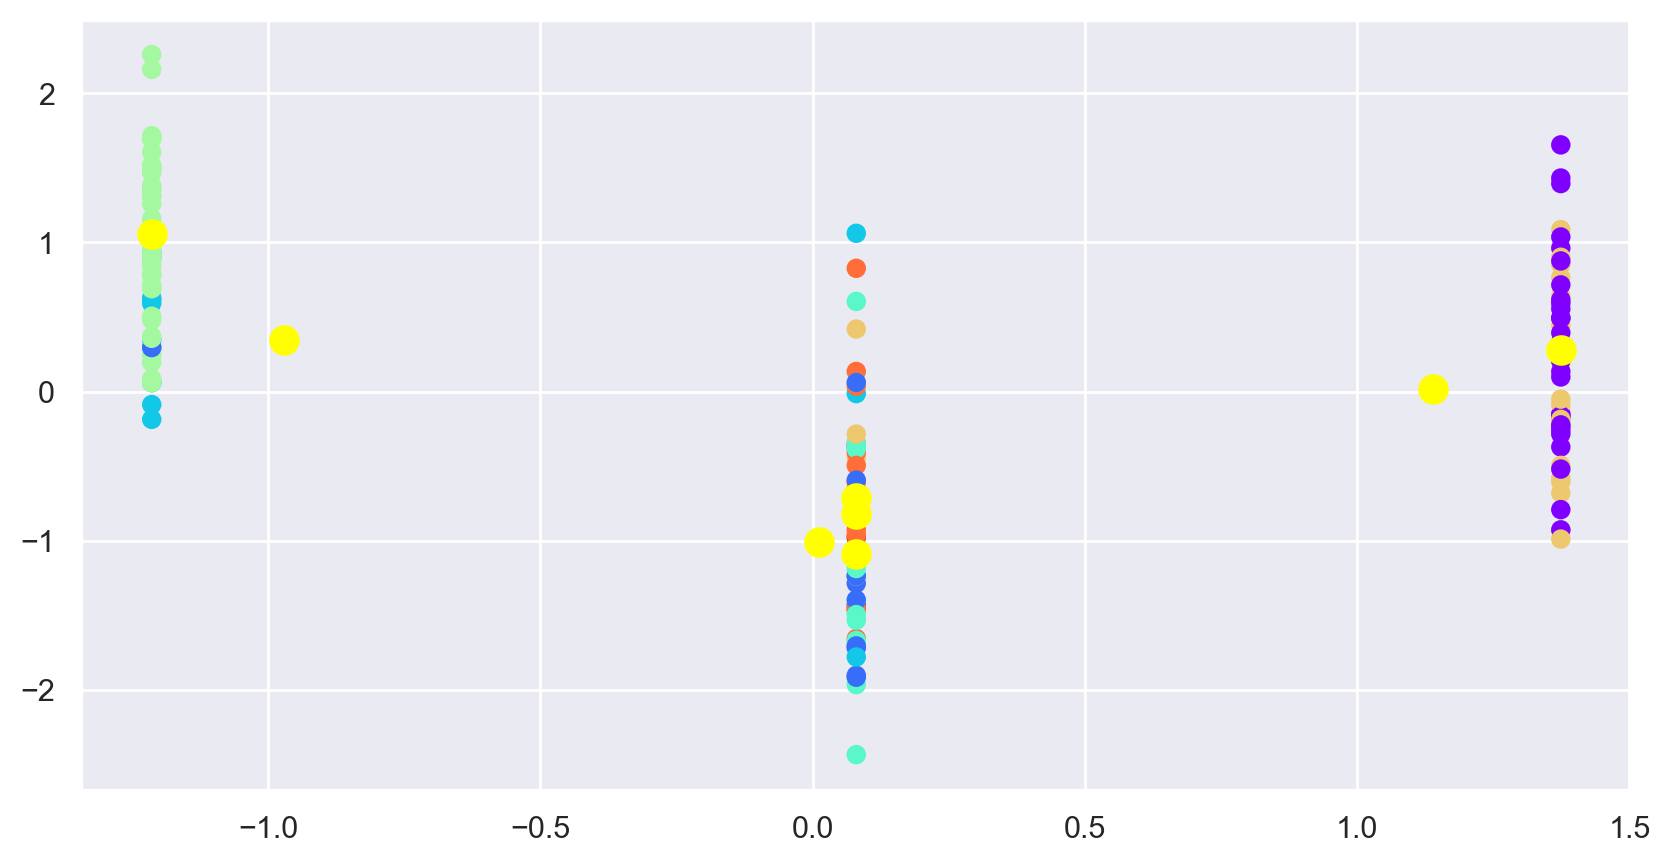

In [55]:
plt.scatter(x[:,0],x[:,1], c = yp, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 100)

In [56]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [57]:
wcss

[2492.0000000000005,
 1727.2286609320033,
 1285.562258740204,
 1182.948470338926,
 1117.9566052100097,
 1054.6611482967598,
 1003.0513779943443,
 952.70604135582,
 915.003499707337,
 856.8998519725978]

Text(0.5, 1.0, 'Elbow Graph')

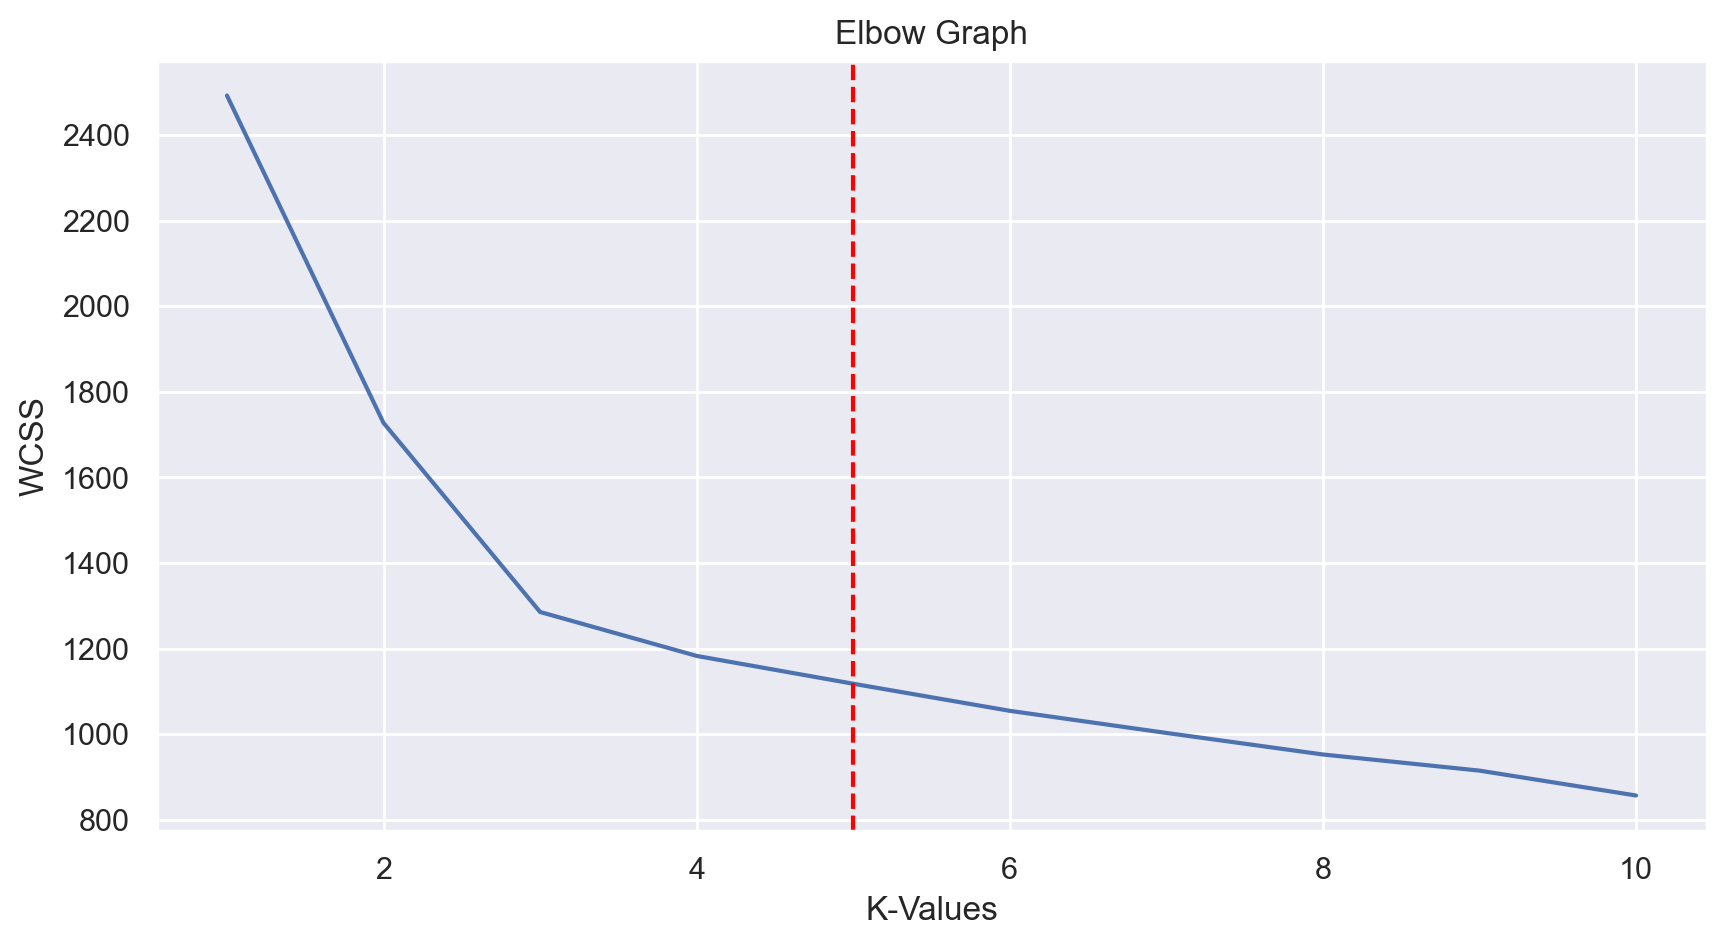

In [58]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 5, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [59]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 4, 4, 3, 4,
       4, 4, 3, 4, 3, 2, 3, 2, 4, 4, 4, 3, 4, 2, 4, 4, 3, 3, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 3, 4, 3, 4, 2,
       2, 4, 3, 3, 3, 4, 4, 4, 3, 4, 2, 2, 2, 2, 2, 4, 4, 3, 3, 3, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [61]:
km.cluster_centers_

array([[ 1.37386437,  0.20607781,  0.93531972,  0.27249461,  0.60208828,
        -0.00874519, -0.99856896, -1.2484577 ,  0.66397439, -0.76988244,
         1.02933041, -1.2116638 , -1.30573467, -0.37393973],
       [-1.21394365,  0.97576974, -0.36378464,  0.24534469, -0.81416494,
         0.43559525,  0.89901929,  0.98462062, -0.61854156,  0.54730527,
         0.24550357,  0.47704578,  0.77086772,  1.25833074],
       [-0.22448764, -0.65109404,  0.52392261,  0.70724686,  0.83348436,
         0.65006509,  0.64876424,  0.63559454, -0.38464973,  0.89301864,
        -0.75693457,  0.09119459,  0.77446303, -0.44342865],
       [ 0.1297259 , -0.88445292, -0.39238431,  0.00289078,  0.49121382,
        -0.70289198, -0.65467085, -0.41977437,  0.98608882, -0.55482917,
        -0.81423541,  0.29569222, -0.27617713, -0.70686265],
       [ 0.07996036, -0.88753388, -0.68656254, -1.16362308, -0.31696579,
        -0.49462513,  0.10542818,  0.14037588, -0.49352347,  0.16142201,
        -0.84373386,  0.65

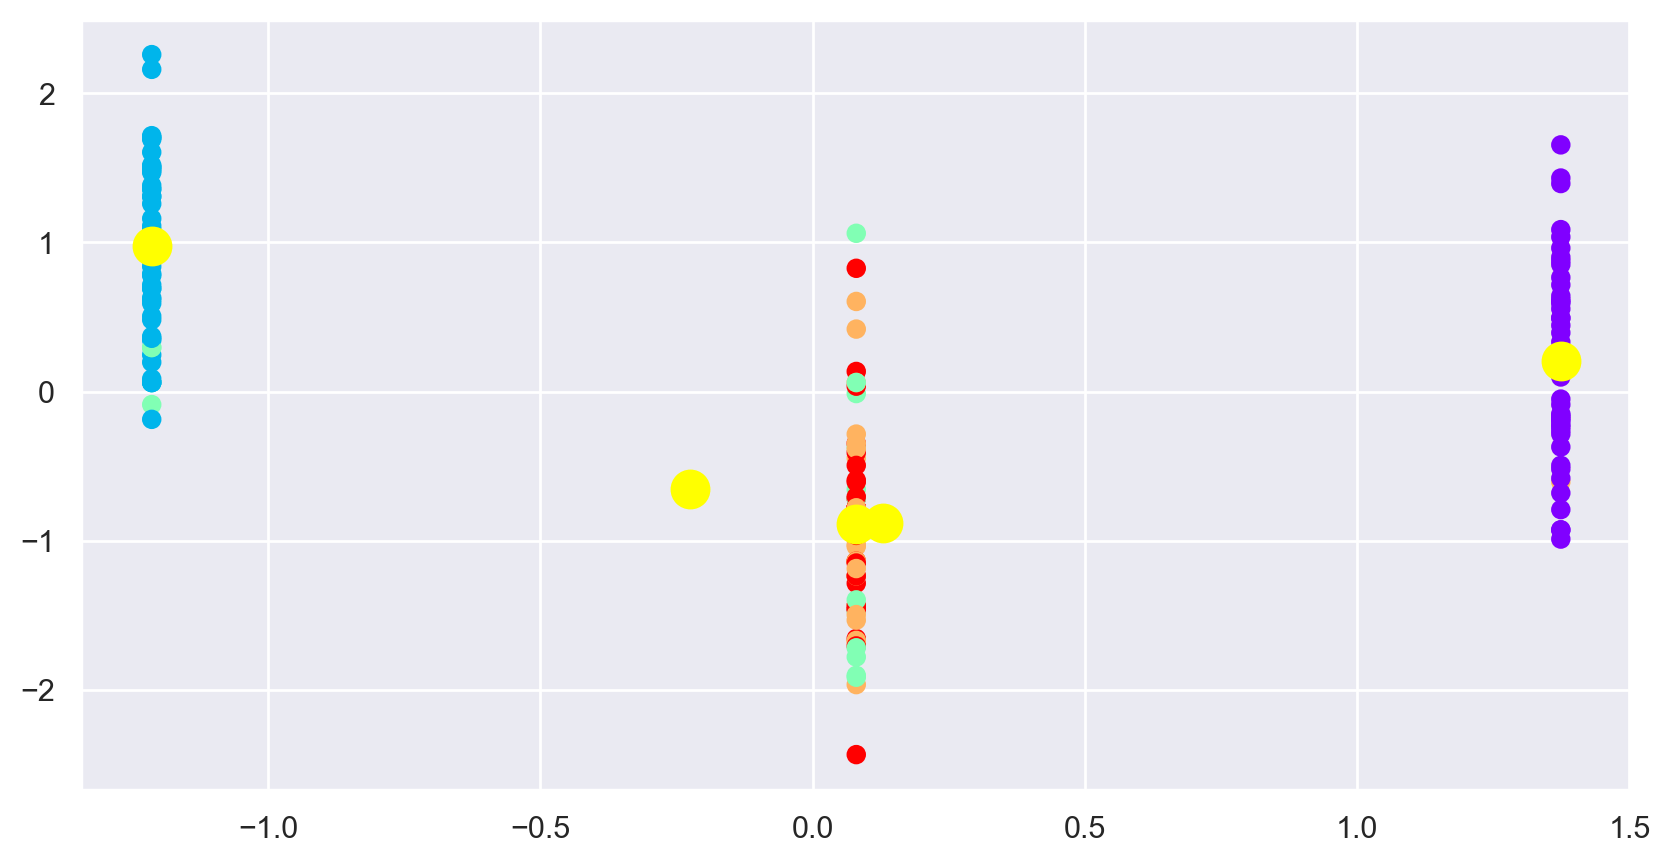

In [62]:
plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 178)

In [63]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=178, centers=5, random_state=42)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the result
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.6752
